<a href="https://colab.research.google.com/github/DarshanaHeendeniya/ML_Learning/blob/main/Bitcoin_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [2]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19'],
              dtype='datetime64[ns]', name='Date', length=2713, freq=None)

In [4]:
# Select Bit Coin data for November
df.loc['2020-11'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-01,13780.995117,13862.033203,13628.377930,13737.109375,13737.109375,24453857900
2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,13550.489258,30771455468
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,13950.300781,29869951617
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,14133.707031,35116364962
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,15579.848633,40856321439


In [5]:
# Loading the data and setting index
df1 = pd.read_csv('/BTC-USD.csv', index_col='Date', parse_dates= True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19'],
              dtype='datetime64[ns]', name='Date', length=2713, freq=None)

In [7]:
# Resampling to monthly frequancy and calculate the mean closing price
df1.resample('M').mean()['Close'].head()

/tmp/ipython-input-3625788916.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1.resample('M').mean()['Close'].head()


,Close
Date,
2014-09-30,407.182428
2014-10-31,364.148873
2014-11-30,366.099799
2014-12-31,341.267871
2015-01-31,248.782547


In [8]:
# Resampling to weekly frequancy and calculate the mean closing price
df1.resample('W').mean()['Close'].head()

,Close
Date,
2014-09-21,416.859003
2014-09-28,407.692566
2014-10-05,361.426570
2014-10-12,355.234580
2014-10-19,390.479854


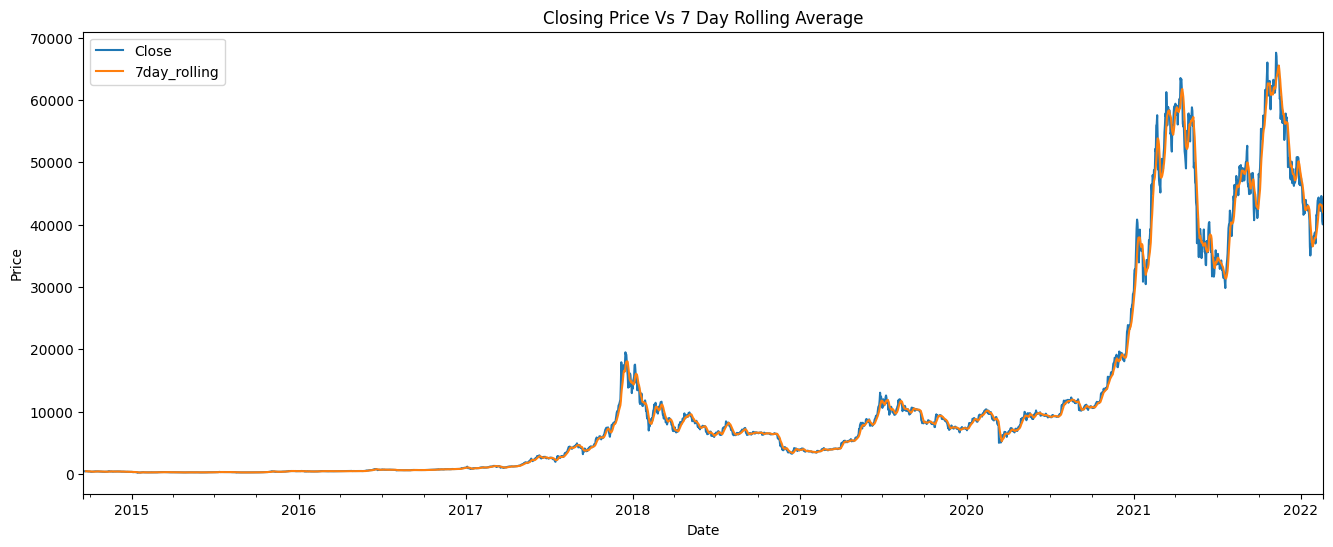

In [9]:
# 7day rolling avereage of closing price
df1['7day_rolling'] = df1['Close'].rolling(window = 7).mean()
df1[['Close', '7day_rolling']].plot(figsize=(16,6), title = 'Closing Price Vs 7 Day Rolling Average', ylabel = 'Price', legend = True)
plt.show()

/tmp/ipython-input-720949282.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


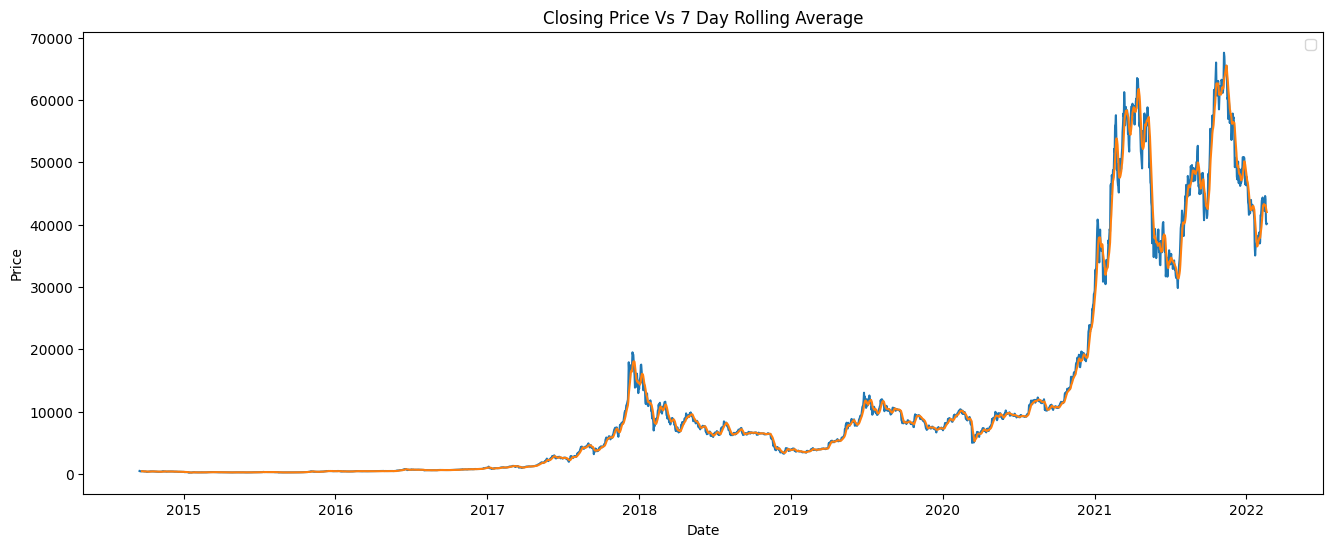

In [10]:
plt.figure(figsize=(16,6))
plt.plot(df1[['Close', '7day_rolling']])
plt.title('Closing Price Vs 7 Day Rolling Average')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

<Axes: title={'center': 'Closing Price Vs 7 Day Rolling Average'}, xlabel='Date', ylabel='Price'>

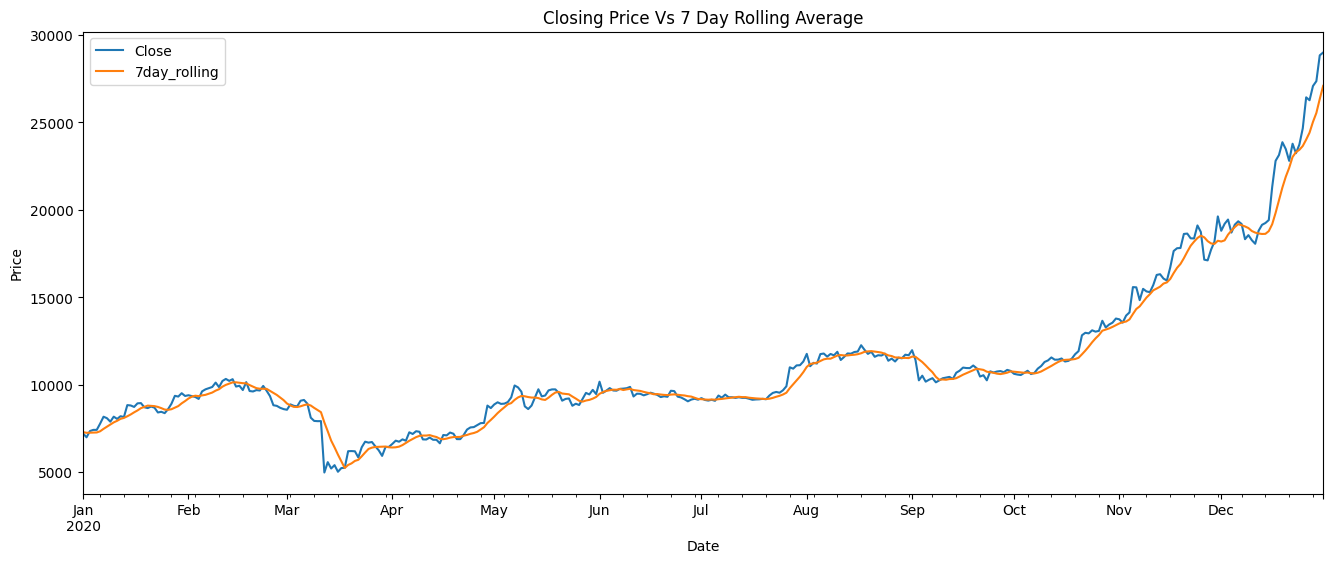

In [11]:
df1[['Close', '7day_rolling']].loc['2020'].plot(figsize=(16,6), title = 'Closing Price Vs 7 Day Rolling Average', ylabel = 'Price', xlabel ='Date', legend = True)

In [12]:
# Find out the highest average month
df1.resample('M').mean()['Close'].idxmax()

/tmp/ipython-input-3654374974.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1.resample('M').mean()['Close'].idxmax()


Timestamp('2021-11-30 00:00:00')

In [13]:
# Calculate daily returns
df1['Daily_Return'] = df1['Close'].pct_change()*100
df1.head()

,Open,High,Low,Close,Adj Close,Volume,7day_rolling,Daily_Return
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855


In [14]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,7day_rolling,Daily_Return
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855


In [15]:
# Days with more than 10% change in closing price
df1[abs(df1['Daily_Return']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7day_rolling,Daily_Return
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138995,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


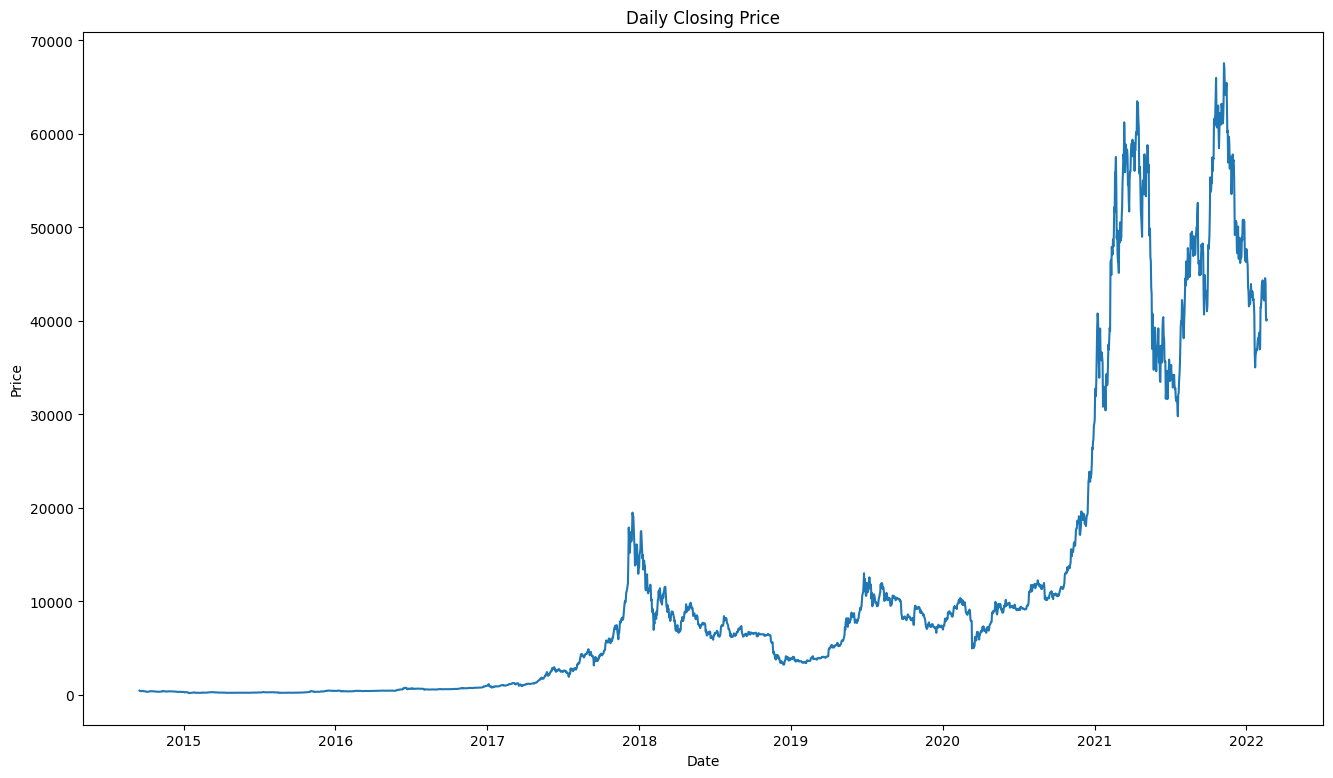

In [16]:
# Data Visualization
# Display daily closing price in a plot

plt.figure(figsize = (16,9))
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Price')
plt.legend
plt.show()

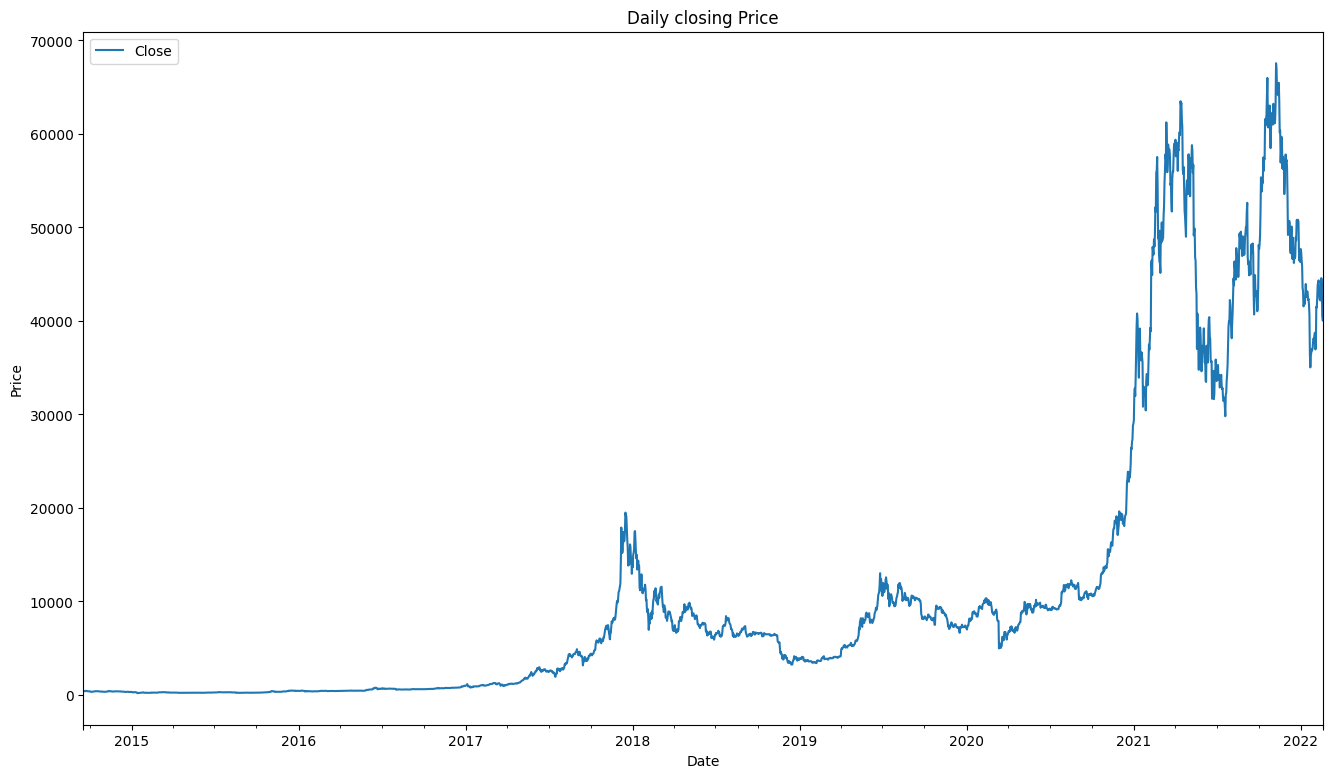

In [17]:
df1['Close'].plot(figsize = (16, 9), title = 'Daily closing Price', xlabel = 'Date', ylabel = 'Price', legend = True)
plt.show()

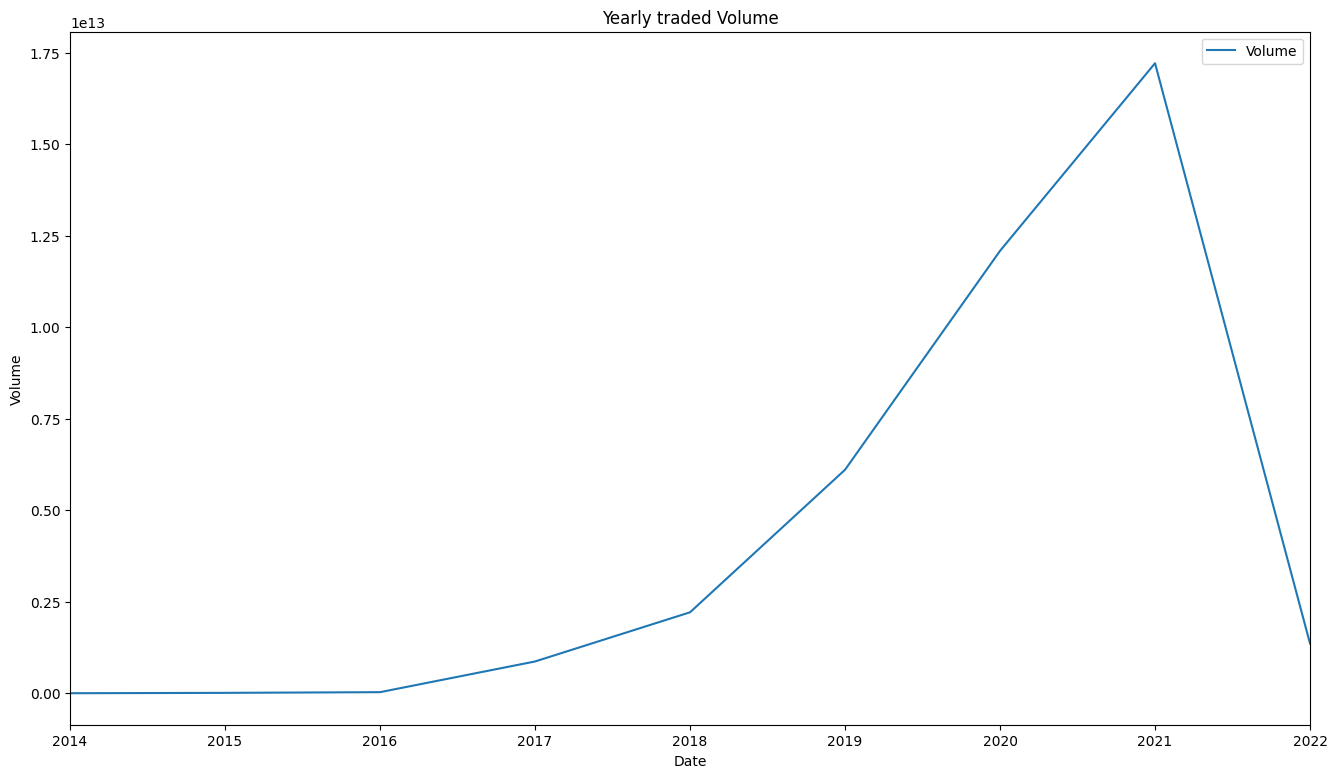

In [18]:
# Plot Yearly Volume in a plot

df1.resample('YE').sum()['Volume'].plot(figsize = (16,9), title = 'Yearly traded Volume', xlabel= 'Date', ylabel = 'Volume', legend = True)
plt.show()

/tmp/ipython-input-171695896.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


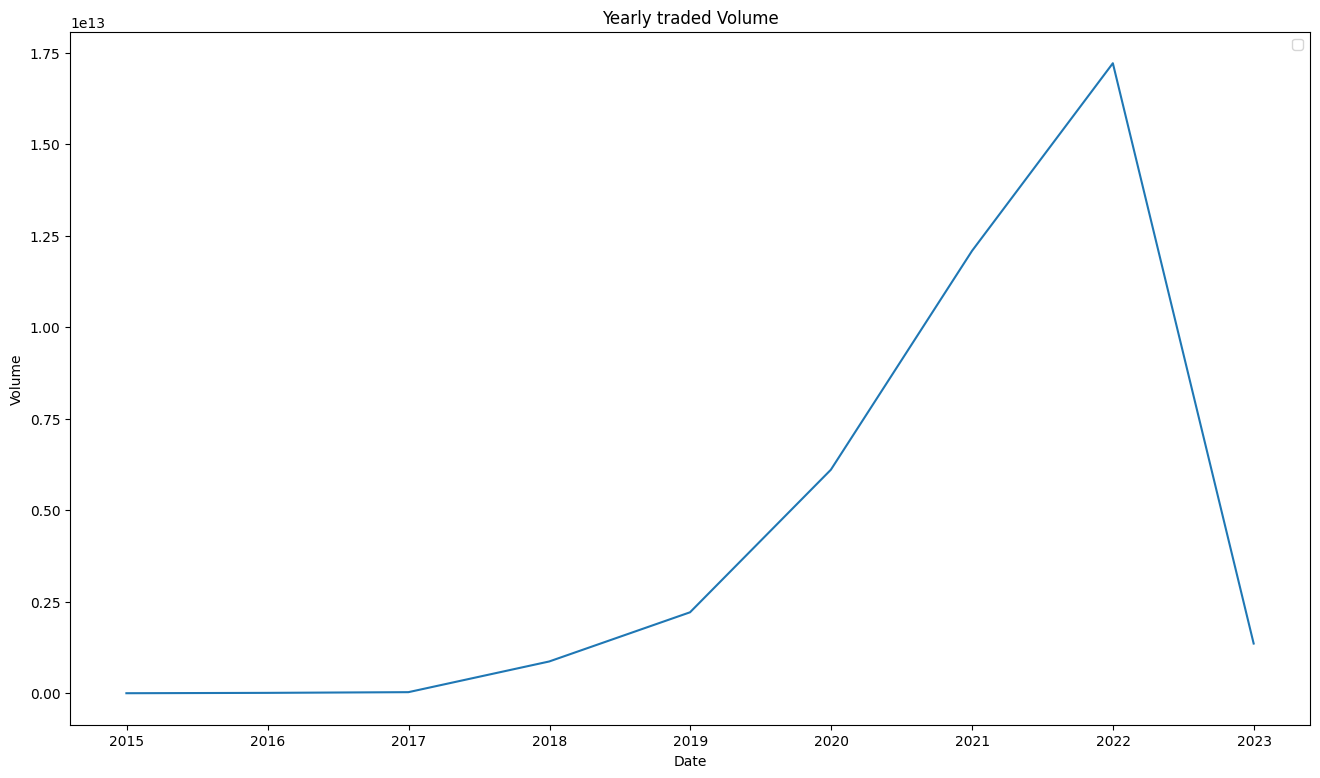

In [19]:
plt.figure(figsize = (16, 9))
plt.plot(df1.resample('YE').sum()['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Yearly traded Volume')
plt.legend()
plt.show()

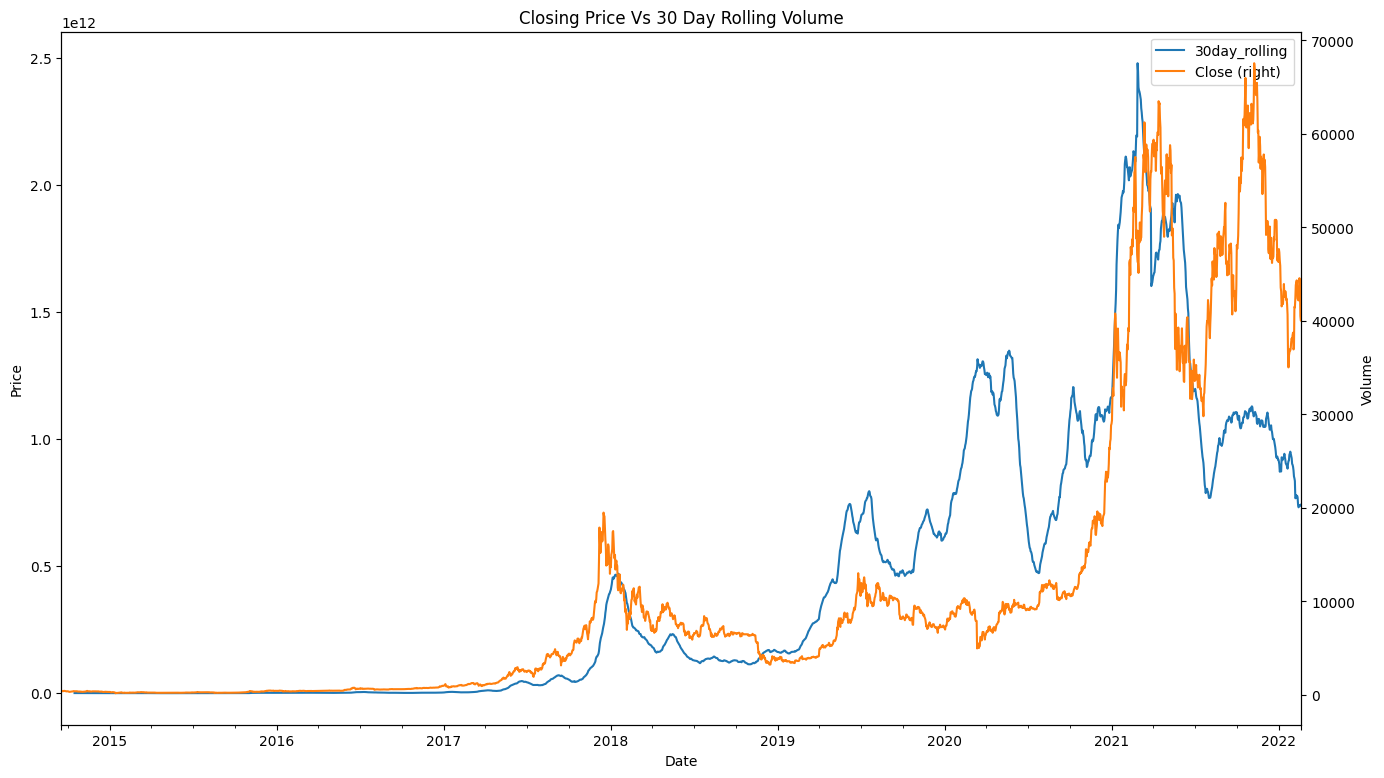

In [20]:
# Plotting closing price and 30 day rolling volume

df1['30day_rolling'] = df1['Volume'].rolling(window = 30).sum()
df1['30day_rolling'].plot(figsize = (16, 9), title = 'Closing Price Vs 30 Day Rolling Volume', xlabel = 'Date', ylabel = 'Price', legend = True)
ax = df1['Close'].plot(secondary_y = True, legend = True, ylabel= 'Volume')
plt.show()

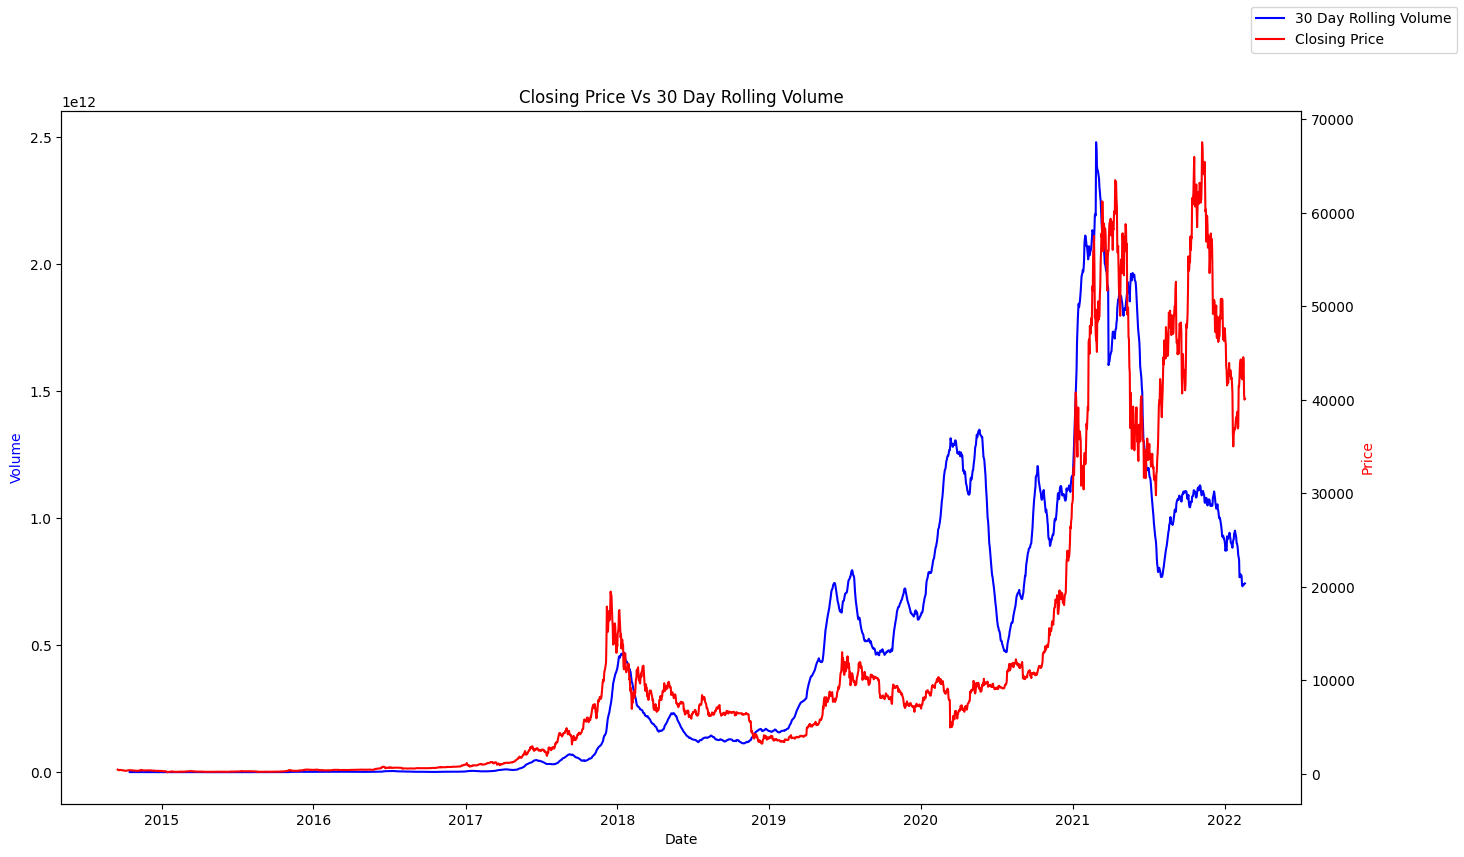

In [21]:
fig, ax1 = plt.subplots(figsize=(16, 9))

# Plot 30-day rolling volume on the primary y-axis (ax1)
ax1.plot(df1['30day_rolling'], color='blue', label='30 Day Rolling Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')


# Create a secondary y-axis (ax2)
ax2 = ax1.twinx()

# Plot Closing Price on the secondary y-axis (ax2)
ax2.plot(df1['Close'], color='red', label='Closing Price')
ax2.set_ylabel('Price', color='red')


plt.title('Closing Price Vs 30 Day Rolling Volume')
fig.legend()
plt.show()

In [22]:
# Correlation with closing price and 30day rolling average
df1[['Close', '30day_rolling']].corr()

,Close,30day_rolling
Close,1.000000,0.799098
30day_rolling,0.799098,1.000000


# Data manipulation

In [23]:
# Identify missing values
df1.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7day_rolling,6
Daily_Return,1
30day_rolling,29


In [24]:
# Fill the missing values
df1['30day_rolling'].fillna(method = 'bfill', inplace = True)
df1.isnull().sum()

/tmp/ipython-input-857663442.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['30day_rolling'].fillna(method = 'bfill', inplace = True)


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7day_rolling,6
Daily_Return,1
30day_rolling,0


In [25]:
df1['7day_rolling'].interpolate(method = 'linear', inplace = True)
df1.isnull().sum()

/tmp/ipython-input-3829060075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['7day_rolling'].interpolate(method = 'linear', inplace = True)


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7day_rolling,6
Daily_Return,1
30day_rolling,0


In [26]:
# Extract time variables

df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1['day'] =  df1.index.day
df1['day_of_week'] = df1.index.dayofweek
df1['day_name'] = df1.index.day_name()
df1['is_weekend'] = df1.index.dayofweek > 4
df1['quarter'] = df1.index.quarter
df1.head()

,Open,High,Low,Close,Adj Close,Volume,7day_rolling,Daily_Return,30day_rolling,year,month,day,day_of_week,day_name,is_weekend,quarter
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,1.087457e+09,2014,9,17,2,Wednesday,False,3
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,1.087457e+09,2014,9,18,3,Thursday,False,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264,1.087457e+09,2014,9,19,4,Friday,False,3
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,1.087457e+09,2014,9,20,5,Saturday,True,3
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855,1.087457e+09,2014,9,21,6,Sunday,True,3


In [27]:
# Feature engineering - Lagged values
df1['Close_lag1'] = df1['Close'].shift(1)
df1['Close_lag2'] = df1['Close'].shift(2)

df1.head()

,Open,High,Low,Close,Adj Close,Volume,7day_rolling,Daily_Return,30day_rolling,year,month,day,day_of_week,day_name,is_weekend,quarter,Close_lag1,Close_lag2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,1.087457e+09,2014,9,17,2,Wednesday,False,3,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,1.087457e+09,2014,9,18,3,Thursday,False,3,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264,1.087457e+09,2014,9,19,4,Friday,False,3,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,1.087457e+09,2014,9,20,5,Saturday,True,3,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855,1.087457e+09,2014,9,21,6,Sunday,True,3,408.903992,394.795990


# **Seasonality**

In [28]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

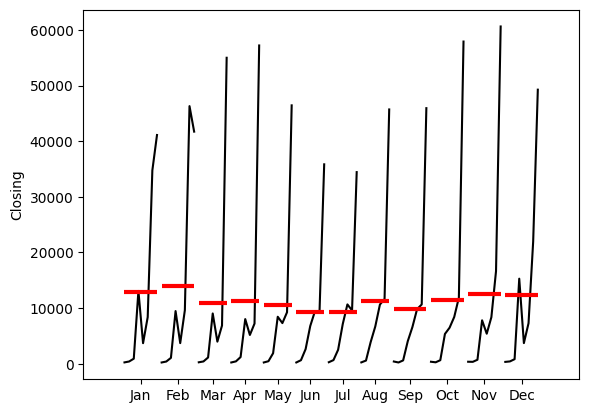

In [29]:
# Plotting the monthly seasonality
month_plot(df1['Close'].resample('ME').mean(), ylabel='Closing')
plt.show()

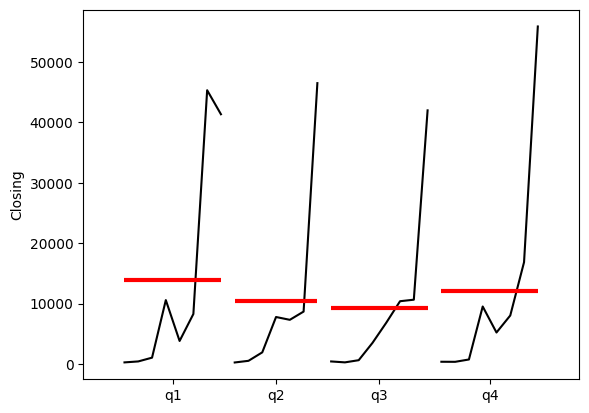

In [30]:
# Plotting quarterly seasonality
quarter_plot(df1['Close'].resample('QE').mean(), ylabel = 'Closing')
plt.show()

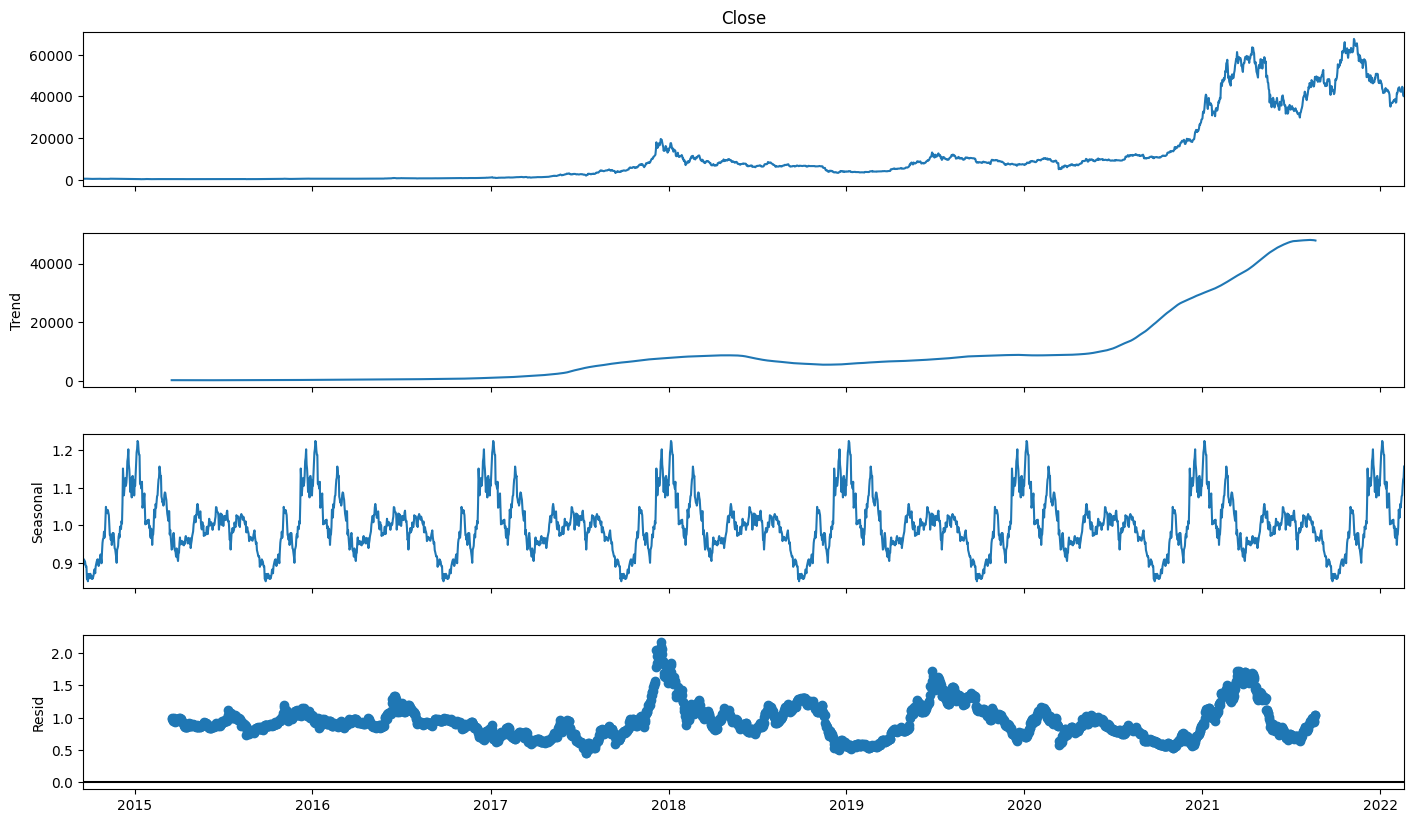

In [31]:
decomposition_1 = seasonal_decompose(df1['Close'], model = 'multiplicative', period = 365)
fig = decomposition_1.plot()
fig.set_size_inches(16, 9)
plt.show()

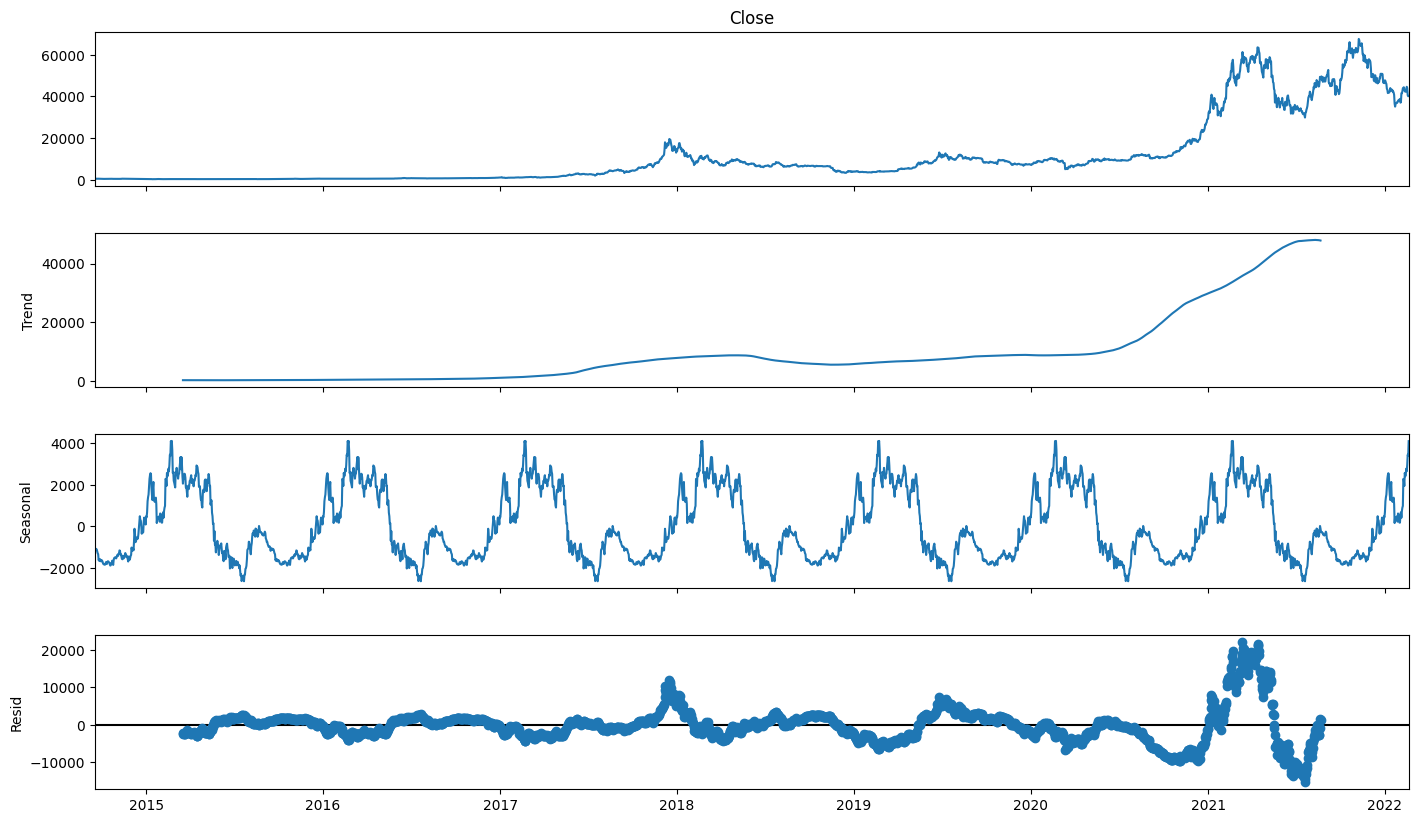

In [32]:
decomposition_2 = seasonal_decompose(df1['Close'], model = 'additive', period = 365)
fig = decomposition_2.plot()
fig.set_size_inches(16,9)
plt.show()

# **Auto-correlation**

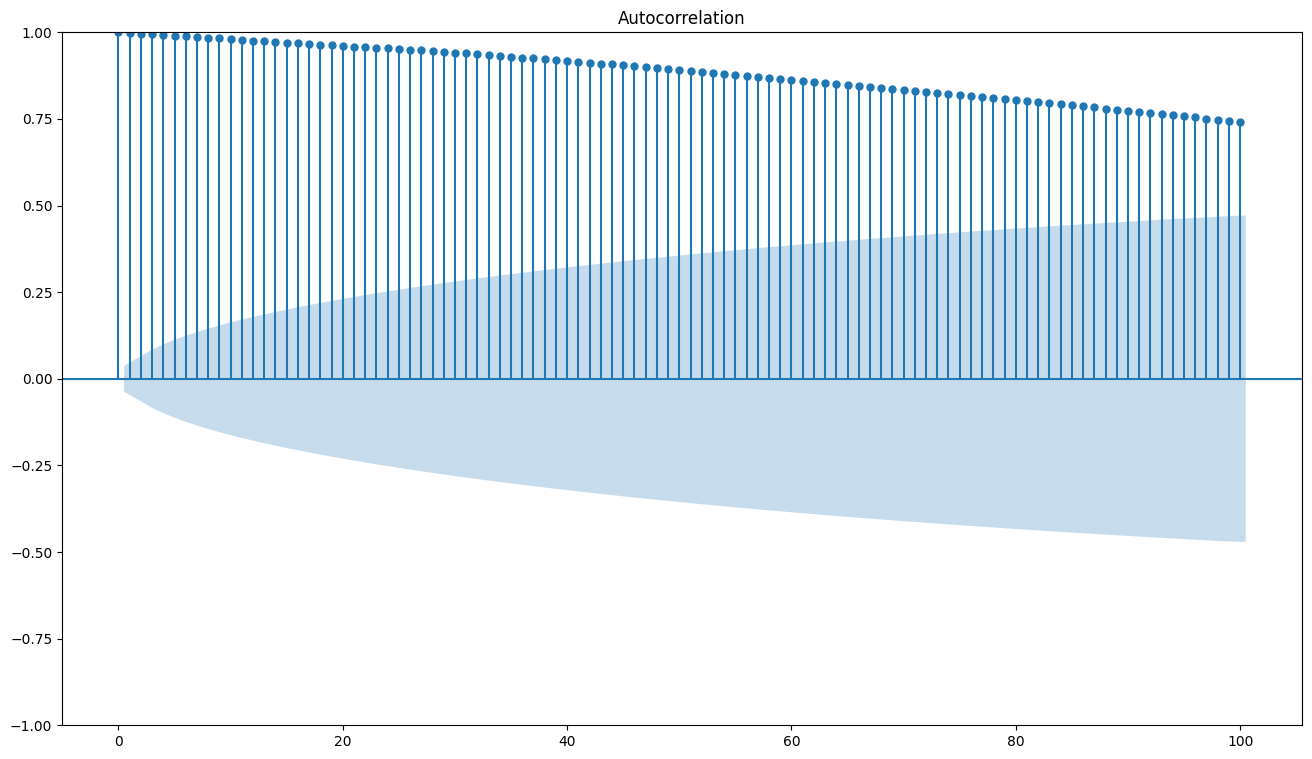

In [33]:
# Plot the auto correlation plot

fig, ax = plt.subplots(figsize = (16,9))
plot_acf(df1['Close'], lags = 100, ax = ax)
plt.show()

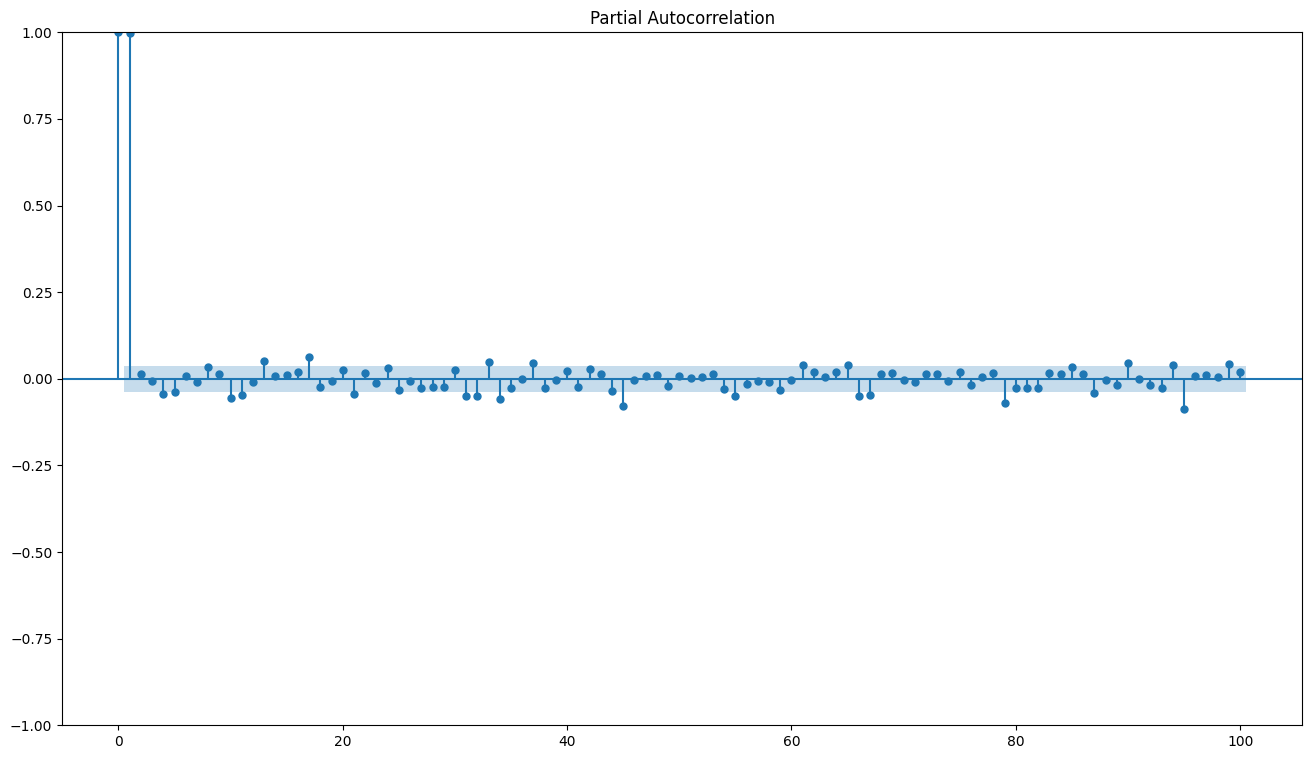

In [34]:
# Plot the Partial Auto Correlation
fig, ax = plt.subplots(figsize = (16,9))
plot_pacf(df1['Close'], lags = 100, ax = ax)
plt.show()

# **Create training and test data sets**

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

period = 543

train, test = df1.iloc[:-period, 3], df1.iloc[-period:, 3]
test.head()

,Close
Date,
2020-08-26,11488.363281
2020-08-27,11323.397461
2020-08-28,11542.500000
2020-08-29,11506.865234
2020-08-30,11711.505859


# **Simple Exponential Smoothing**

In [42]:
model = SimpleExpSmoothing(train)
model_fit = model.fit()
prediction = model_fit.forecast(len(test))
prediction

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,0
2020-08-26,11366.134772
2020-08-27,11366.134772
2020-08-28,11366.134772
2020-08-29,11366.134772
2020-08-30,11366.134772
...,...
2022-02-15,11366.134772
2022-02-16,11366.134772
2022-02-17,11366.134772
2022-02-18,11366.134772


# **Plot training, test and prediction**

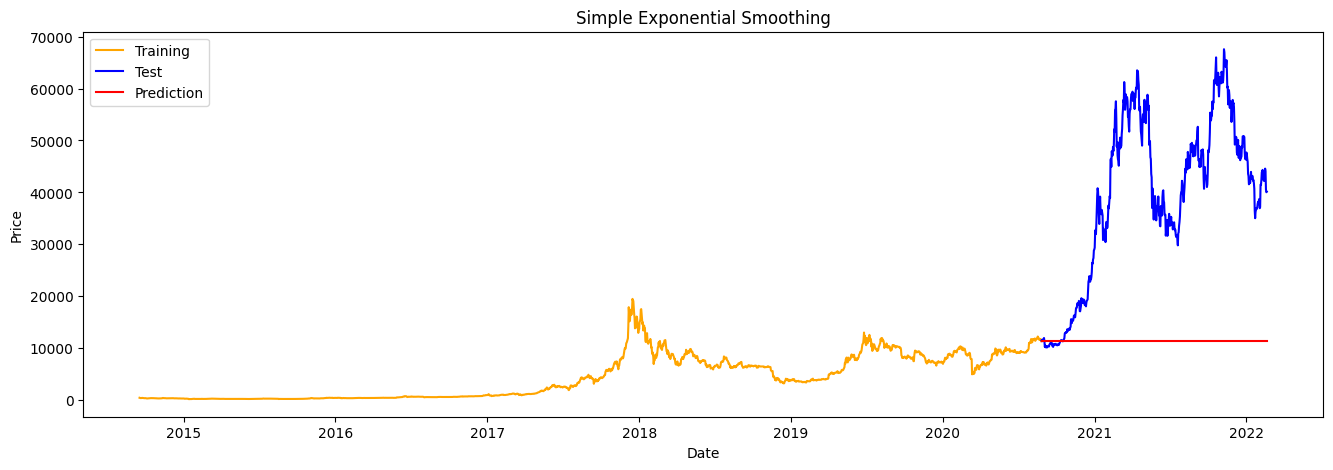

In [47]:
plt.figure(figsize = (16,5))
plt.plot(train, label = 'Training', color = 'orange')
plt.plot(test, label = 'Test', color = 'blue')
plt.plot(prediction, label = 'Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

# **Double Eponential Smoothing**

In [55]:
model_double = ExponentialSmoothing(train, trend = 'add', seasonal = None).fit()
prediction_double = model_double.forecast(len(test))
prediction_double.tail()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,0
2022-02-15,14082.989993
2022-02-16,14088.030541
2022-02-17,14093.071089
2022-02-18,14098.111636
2022-02-19,14103.152184


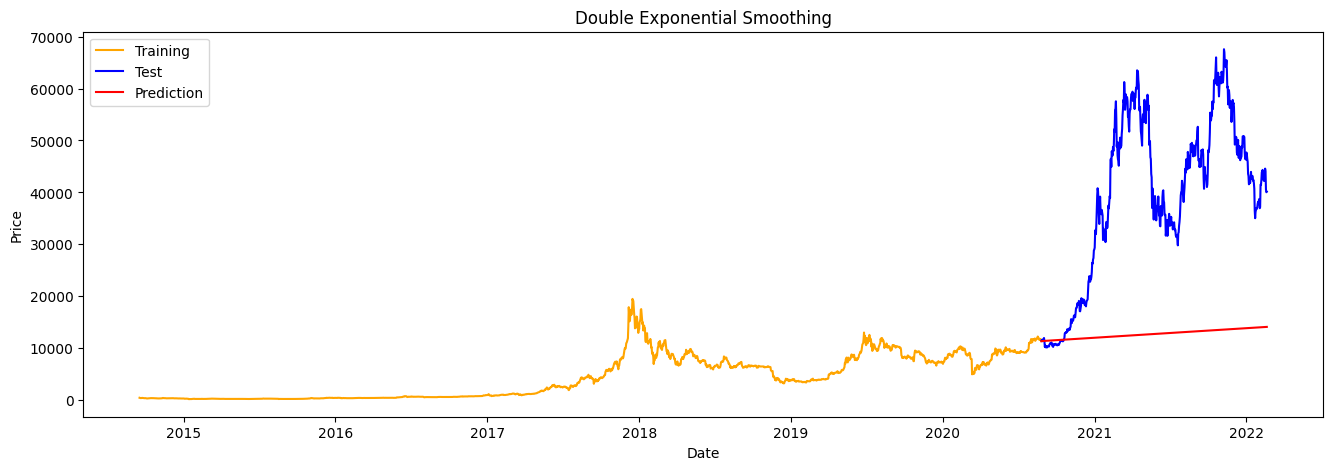

In [57]:
plt.figure(figsize = (16,5))
plt.plot(train, label = 'Training', color = 'orange')
plt.plot(test, label = 'Test', color = 'blue')
plt.plot(prediction_double, label = 'Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()